# Bose-Hubbard Model Analysis

This notebook studies the ground state properties of the 1D Bose-Hubbard model. We analyze the ground state energy per site and the energy gap as functions of the system size.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quspin.operators import hamiltonian
from quspin.basis import boson_basis_1d

## Hamiltonian Construction

We define a function to construct the Bose-Hubbard Hamiltonian for a given number of sites $L$ and particles $N$ using open boundary conditions. The hopping parameter is $J$ and the interaction strength is $U$.

In [13]:
def construct_bh_hamiltonian(L, Np, sps, J, U):
    basis = boson_basis_1d(L =int(L), Nb=[int(Np)], sps=sps)
    
    hop = [[-J, i, i+1] for i in range(L-1)]
    int_list = [[0.5 * U, i] for i in range(L)]
    static = [['+-', hop], ['-+', hop], ['n', int_list]]
    H = hamiltonian(static, [], basis=basis, dtype=np.float64)
    return H, basis

## Ground State Energy per Site vs. System Size

We calculate and plot the ground state energy per site for several system sizes at unit filling.

In [14]:
def compute_energy_vs_L(L_list, sps, J, U):
    energies = []
    for L in L_list:
        Np = L
        H, basis = construct_bh_hamiltonian(L, Np, sps, J, U)
        E0 = H.eigsh(k=1, which='SA', return_eigenvectors=False)[0]
        energies.append(E0 / L)
    return energies

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


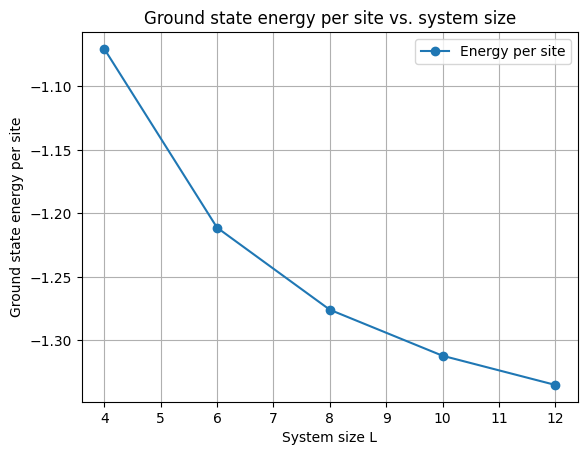

In [20]:
L_vals = np.arange(4, 14, 2)
sps = 4
J = 1.0
U = 1.0

energies = compute_energy_vs_L(L_vals, sps, J, U)

plt.figure()
plt.plot(L_vals, energies, 'o-', label='Energy per site')
plt.xlabel('System size L')
plt.ylabel('Ground state energy per site')
plt.title('Ground state energy per site vs. system size')
plt.grid(True)
plt.legend()
plt.savefig('energy_vs_L.png', dpi=300)
plt.show()

## Energy Gap vs. System Size

We compute the energy difference between the lowest states with $N$ and $N+1$ particles to estimate the energy gap.

In [21]:
def compute_charge_gap_vs_L(L_list, sps, J, U):
    """
    Computes the charge gap Δ = E(N+1) + E(N-1) - 2E(N) 
    for a range of system sizes L.
    
    Parameters:
        L_list (iterable): list of system sizes
        sps (int): states per site
        J (float): hopping parameter
        U (float): on-site interaction
    
    Returns:
        list: charge gap values for each L
    """
    gaps = []
    for L in L_list:
        Np = L  # unit filling
        H0, _ = construct_bh_hamiltonian(L, Np, sps, J, U)
        Hm, _ = construct_bh_hamiltonian(L, Np - 1, sps, J, U)
        Hp, _ = construct_bh_hamiltonian(L, Np + 1, sps, J, U)
        
        E0 = H0.eigsh(k=1, which='SA', return_eigenvectors=False)[0]
        Em = Hm.eigsh(k=1, which='SA', return_eigenvectors=False)[0]
        Ep = Hp.eigsh(k=1, which='SA', return_eigenvectors=False)[0]
        
        gap = Ep + Em - 2 * E0
        gaps.append(gap)
    
    return gaps

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Part

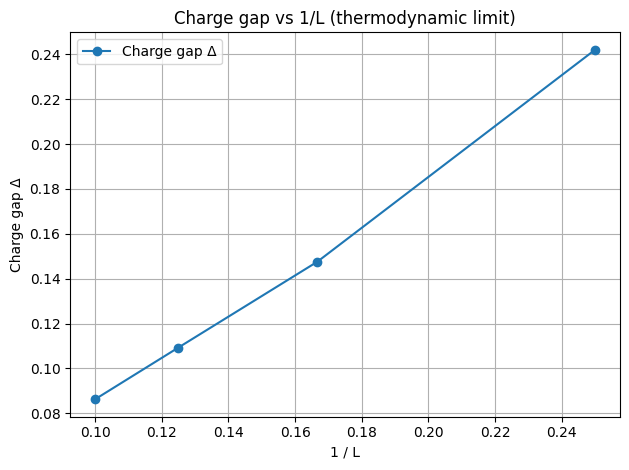

In [23]:
# System sizes to test
L_vals = np.arange(4, 12, 2)  # es. L = 4, 6, ..., 16
sps = 4
J = 1.0
U = 1.0

# Compute charge gaps
charge_gaps = compute_charge_gap_vs_L(L_vals, sps, J, U)

# Plot
plt.figure()
plt.plot(1/L_vals, charge_gaps, 'o-', label='Charge gap Δ')
plt.xlabel("1 / L")
plt.ylabel("Charge gap Δ")
plt.title("Charge gap vs 1/L (thermodynamic limit)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("charge_gap_vs_invL.png", dpi=300)
plt.show()

## Expectation Value of Occupation Number

We compute the expectation value of the occupation number at each site for the ground state.

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


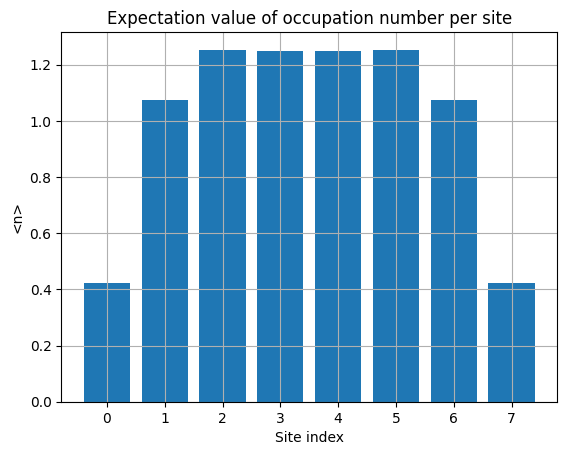

In [27]:
from quspin.operators import quantum_LinearOperator

L = 8
Np = L
H, basis = construct_bh_hamiltonian(L, Np, sps, J, U)
E, psi = H.eigsh(k=1, which='SA')

n_op_list = [quantum_LinearOperator(basis=basis, static_list=[['n', [[1.0, i]]]]) for i in range(L)]
n_expect = np.array([n.expt_value(psi[:, 0]) for n in n_op_list])

plt.figure()
plt.bar(range(L), n_expect)
plt.xlabel('Site index')
plt.ylabel('<n>')
plt.title('Expectation value of occupation number per site')
plt.grid(True)
plt.savefig('n_expectation.png', dpi=300)
plt.show()